📚 Практическая задача: Классификация социально-экономического статуса российских регионов с помощью логистической регрессии

Учебный вопрос 1: Формирование набора данных для применения логистической модели машинного обучения

🎯 Цель этапа:
Научиться готовить данные к обучению модели машинного обучения — чистить, преобразовывать типы, обрабатывать пропуски и формировать признаки и целевую переменную.

📝 Задание 1.1: Загрузите данные из файла

🔧 Инструкция:
Загрузите CSV-файл RussianRegionsProblem.csv в объект DataFrame с помощью библиотеки pandas. Используйте точку с запятой (;) как разделитель.

💡 Подсказка:
Для загрузки используйте функцию pd.read_csv() и укажите параметр sep=';'.

In [1]:
import pandas as pd
import numpy as np

# Загрузите данные из файла
df = pd.read_csv('RussianRegionsProblem.csv', sep=';', on_bad_lines='skip')

# Выведите первые несколько строк датафрейма
df.head()

,Регион,Отношение медианных доходов к стоимости фиксированного набора товаров и услуг,"Доля населения за чертой бедности в 2024 г., %",Рейтинговый балл качества жизни (2024),"Изменение числа работающих за 2023 год, %","Доля безработных в IV квартале 2023 года, %",Рейтинговый балл по научно-техническому прогрессу,Рейтинговый балл по ЗОЖ,"Интегральный рейтинг по социально-экономическому развитию, баллы",Место в итоговом рейтинге
0,Алтайский край,"1,47","12,1","47,383","-1,9","3,4","30,28","68,2","47,114",61
1,Амурская область,"2,06","9,5","45,582","3,7","1,9","19,9","48,5","47,097",64
2,Архангельская область,"1,96","8,1","41,326","-11,1","5,1","39,7","53,8","39,939",56
3,Астраханская область,"1,71","10,7","51,323","0,3","3,3","22,38","68,9","38,224",NaN
4,Белгородская область,"2,26","4,4","65,638","-0,3","3,4","43,64",66,"60,69",16


✅ Результат: Вы получите структурированный набор данных, который можно использовать для дальнейшей обработки

📝 Задание 1.2: Проверьте данные на наличие пропусков
🔍 Цель задания:
На этом этапе мы хотим понять, есть ли в нашем датафрейме пустые (отсутствующие) значения , и если да — то в каких столбцах они находятся .

Пропущенные данные — это очень частая ситуация при работе с реальными данными. Они могут быть обозначены по-разному: как NaN, '-', "н/д", None, пустые строки и т.д.

В нашем случае в данных есть такие обозначения, как:
"н/д" — не данные,
"-" — отсутствие информации,
и, возможно, стандартные NaN, которые Python автоматически распознаёт как пропуски.

🔧 Что нужно сделать:
После того как вы загрузили данные, необходимо проверить, есть ли в каждом из столбцов пропущенные значения, и если есть — сколько их.

Для этого используется метод .isna() библиотеки pandas.

Метод .isna() проверяет каждый элемент в DataFrame и возвращает True, если значение пропущено (NaN), и False — если оно есть.

In [2]:
df.isna().sum()

Регион                                                                            0
Отношение медианных доходов к стоимости фиксированного набора товаров и услуг     0
Доля населения за чертой бедности в 2024 г., %                                    0
Рейтинговый балл качества жизни (2024)                                            0
Изменение числа работающих за 2023 год, %                                         0
Доля безработных в IV квартале 2023 года, %                                       0
Рейтинговый балл по научно-техническому прогрессу                                 0
Рейтинговый балл по ЗОЖ                                                           0
Интегральный рейтинг по социально-экономическому развитию, баллы                  0
Место в итоговом рейтинге                                                        10
dtype: int64

🧐 Вопрос:
Что выполняет данная строка кода?

📃 Ответ: она показывает общее число пропущенных значений (NaN) в каждом столбце.

📌 В наших данных есть ещё и текстовые обозначения пропусков — например, "н/д" или "-". Эти значения не считаются NaN , поэтому нам нужно заранее заменить их на NaN, чтобы корректно считать пропуски.

In [3]:
df = df.replace(['-', 'н/д', 'Н/Д'], pd.NA)
df.isna().sum()

Регион                                                                            0
Отношение медианных доходов к стоимости фиксированного набора товаров и услуг     4
Доля населения за чертой бедности в 2024 г., %                                    4
Рейтинговый балл качества жизни (2024)                                            4
Изменение числа работающих за 2023 год, %                                         4
Доля безработных в IV квартале 2023 года, %                                       4
Рейтинговый балл по научно-техническому прогрессу                                 4
Рейтинговый балл по ЗОЖ                                                           4
Интегральный рейтинг по социально-экономическому развитию, баллы                  4
Место в итоговом рейтинге                                                        14
dtype: int64

🧠 Почему это важно?
Наличие пропусков может повлиять на обучение модели.
Мы должны решить: удалить строки с пропусками, заполнить их средними значениями или оставить как есть.

📝 Задание 1.3: Очистка данных от объектов с недостаточным количеством информации и преобразование числовых значений
🔍 Цель:
На данном этапе предполагается выполнить фильтрацию исходного набора данных с целью удаления объектов, для которых отсутствует значительная часть информации, а также привести числовые значения к единому формату с плавающей точкой (float). Это необходимо для обеспечения корректной работы последующих этапов анализа и построения модели машинного обучения.

❗ Однако важно понимать:
Мы не удаляем регионы, у которых отсутствует только столбец "Место в итоговом рейтинге" , потому что такие регионы мы будем классифицировать позже с помощью модели.

🔧 Инструкция:
Мы уже заменили все значения '-' и 'н/д' на NaN, чтобы они считались пропусками.
Теперь удалим строки, где слишком много пропусков , например, если заполнено меньше 7 столбцов из 10

In [4]:
# Шаг 1: Замена ',' на '.' и преобразование к float для всех числовых столбцов
for col in df.columns[1:-1]:  # Пропускаем столбцы "Регион" и "Место в итоговом рейтинге"
    df[col] = pd.to_numeric(df[col].str.replace(',', '.'), errors='coerce') # errors='coerce' — это параметр, который используется в функциях pandas, чтобы превращать ошибки в NaN 

# Шаг 2: Удаление строк с большим количеством пропусков
df_cleaned = df.dropna(thresh=7)  # оставляем только строки с минимум 7 непропущенными столбцами

# Проверка результата
print("Количество регионов после очистки:", len(df_cleaned))

Количество регионов после очистки: 85


📌 Метод .dropna() используется в библиотеке pandas для удаления строк или столбцов , которые содержат пропущенные значения (NaN)

📌 Параметр thresh (от англ. threshold — порог) позволяет задать минимальное количество заполненных значений (не NaN) в строке

📌  Перед выполнением анализа и моделирования необходимо убедиться, что все числовые признаки представлены в корректном формате с плавающей точкой (float). Для этого требуется заменить десятичные разделители (например, запятые на точки) и преобразовать значения соответствующим образом. Такое преобразование гарантирует корректную интерпретацию чисел алгоритмами машинного обучения.

✅ Результат:
Ты получишь новый DataFrame df_cleaned, в котором удалены неинформативные строки.
В этом DataFrame остаются регионы, у которых почти все данные заполнены, даже если нет значения в столбце "Место в итоговом рейтинге".

💡 Подсказка:
Если хочешь посмотреть, какие именно регионы были удалены, можешь сделать так:

In [5]:
removed_regions = df[~df['Регион'].isin(df_cleaned['Регион'])]
print("Удалённые регионы:")
print(removed_regions['Регион'])

Удалённые регионы:
10     Донецкая Народная Республика
13              Запорожская область
30    Луганская Народная Республика
82               Херсонская область
Name: Регион, dtype: object


📝 Задание 1.4: Создание целевой переменной

🎯 Цель:
Сформировать целевую переменную для задачи бинарной классификации, которая будет использоваться в дальнейшем обучении модели логистической регрессии

🔍 Повторение материалов лекции:

🧠 Что такое целевая переменная в задаче машинного обучения, и какую роль она играет при обучении нашей модели?

Ответ:
Целевая переменная (target variable) — это выходная величина , которую модель пытается предсказать на основе входных признаков.

🔹 В контексте задачи классификации, такой как наша:

Мы хотим определить, к какой категории относится объект (регион): "лидер" или "отстающий".
Целевая переменная принимает дискретные значения , например 0 или 1, где:
1 — регион является лидером (место в рейтинге ≤ 30),
0 — регион отстающий (место > 30),
NaN — неизвестный статус региона, который мы будем предсказывать.

🔹 В терминах машинного обучения:
Целевая переменная — это зависимая переменная , обозначаемая обычно как y.
Она используется для обучения модели , чтобы та могла находить закономерности во входных данных (признаках X) и делать предсказания на новых данных.
🔹 Например, в задаче логистической регрессии модель учится оценивать вероятность принадлежности объекта к классу 1 на основе функции сигмоиды, используя значения признаков и подобранные веса
🔹 Таким образом, целевая переменная — это "учитель" для модели : именно по ней модель понимает, какие комбинации входных признаков соответствуют тому или иному классу.

In [6]:
# Шаг 1: Преобразуем столбец "Место в итоговом рейтинге" в числовой формат
df_cleaned['Место в итоговом рейтинге'] = pd.to_numeric(df_cleaned['Место в итоговом рейтинге'], errors='coerce')

# Шаг 2: Создаём целевую переменную
def classify_region(row):
    place = row['Место в итоговом рейтинге']
    if pd.isna(place):  # Если место не определено
        return np.nan
    elif place <= 30:   # Лидер
        return 1
    else:               # Отстающий
        return 0

# Применяем функцию к каждой строке
df_cleaned['target'] = df_cleaned.apply(classify_region, axis=1)

# Проверяем результат
print("\nПримеры классификации регионов:")
print(df_cleaned[['Регион', 'Место в итоговом рейтинге', 'target']].head(15))

<ipython-input-6-3b4809fe4801>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Место в итоговом рейтинге'] = pd.to_numeric(df_cleaned['Место в итоговом рейтинге'], errors='coerce')
<ipython-input-6-3b4809fe4801>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['target'] = df_cleaned.apply(classify_region, axis=1)



Примеры классификации регионов:
                             Регион  Место в итоговом рейтинге  target
0                    Алтайский край                       61.0     0.0
1                  Амурская область                       64.0     0.0
2             Архангельская область                       56.0     0.0
3              Астраханская область                        NaN     NaN
4              Белгородская область                       16.0     1.0
5                  Брянская область                       53.0     0.0
6              Владимирская область                       31.0     0.0
7             Волгоградская область                       29.0     1.0
8               Вологодская область                       44.0     0.0
9               Воронежская область                        NaN     NaN
11     Еврейская автономная область                       83.0     0.0
12               Забайкальский край                       78.0     0.0
14               Ивановская область         

Ты столкнулся с предупреждением (warning) от pandas

Это предупреждение , а не ошибка, но оно важно — оно сигнализирует о потенциальной проблеме при работе с копиями и представлениями (view vs copy) в pandas

❓ Что означает это предупреждение?
Когда ты делаешь что-то вроде:

In [7]:
df_cleaned = df.dropna(thresh=7)

Ты создаешь новый объект df_cleaned, который, является независимой копией данных. Однако pandas не всегда может быть уверен в этом — иногда операции возвращают представление (view) исходного DataFrame.

Если ты потом изменяешь значения в df_cleaned, pandas не знает, хочешь ли ты:

▪️ Изменить только df_cleaned,
▪️ Или изменить и исходный df.
Чтобы избежать путаницы, он выводит предупреждение.

✅ Как исправить?
✔️ Решение: Явно создать копию
Лучший способ избежать SettingWithCopyWarning — явно создать копию DataFrame после фильтрации или очистки:

In [8]:
df_cleaned = df.dropna(thresh=7).copy()

Теперь df_cleaned гарантированно не связан с оригиналом, и предупреждения не будет.

Попробуем заново запустить наш код:

In [9]:
# Шаг 1: Преобразуем столбец "Место в итоговом рейтинге" в числовой формат
df_cleaned['Место в итоговом рейтинге'] = pd.to_numeric(df_cleaned['Место в итоговом рейтинге'], errors='coerce')

# Шаг 2: Создаём целевую переменную
def classify_region(row):
    place = row['Место в итоговом рейтинге']
    if pd.isna(place):  # Если место не определено
        return np.nan
    elif place <= 30:   # Лидер
        return 1
    else:               # Отстающий
        return 0

# Применяем функцию к каждой строке
df_cleaned['target'] = df_cleaned.apply(classify_region, axis=1)

# Проверяем результат
print("\nПримеры классификации регионов:")
print(df_cleaned[['Регион', 'Место в итоговом рейтинге', 'target']].head(15))


Примеры классификации регионов:
                             Регион  Место в итоговом рейтинге  target
0                    Алтайский край                       61.0     0.0
1                  Амурская область                       64.0     0.0
2             Архангельская область                       56.0     0.0
3              Астраханская область                        NaN     NaN
4              Белгородская область                       16.0     1.0
5                  Брянская область                       53.0     0.0
6              Владимирская область                       31.0     0.0
7             Волгоградская область                       29.0     1.0
8               Вологодская область                       44.0     0.0
9               Воронежская область                        NaN     NaN
11     Еврейская автономная область                       83.0     0.0
12               Забайкальский край                       78.0     0.0
14               Ивановская область         

📌 Выводы по заданию 1.4

✅ Мы успешно:

✔️ Создали целевую переменную (target) для задачи классификации:
1 — регион-лидер (место в рейтинге ≤ 30),
0 — отстающий регион (место > 30),
NaN — регион с неизвестным местом в рейтинге, который мы будем классифицировать с помощью модели.

✔️ Разделили данные на обучающие и прогнозируемые :
Регионы с известным статусом будут использованы для обучения модели.
Регионы с NaN в целевой переменной оставлены для последующего прогнозирования.

✔️ Научились правильно обрабатывать предупреждение SettingWithCopyWarning:
Использовали метод .copy() при создании df_cleaned, чтобы гарантировать, что это независимая копия данных.

📌 Задание 1.5: Выделите регионы с неизвестным местом в итоговом рейтинге

🔍 Цель:
Найти и выделить регионы, у которых отсутствует информация о месте в итоговом рейтинге , чтобы позже классифицировать их как "лидеры" или "отстающие" с помощью модели машинного обучения.

In [10]:
# Фильтруем регионы с пропущенным местом (NaN или '-')
unknown_regions = df_cleaned[df_cleaned['Место в итоговом рейтинге'].isna()]

# Удаляем из основного датафрейма эти строки — они не нужны для обучения
df_for_training = df_cleaned.drop(unknown_regions.index)

# Проверяем результат
print("Регионы с неизвестным местом в рейтинге:")
print(unknown_regions[['Регион', 'Место в итоговом рейтинге']])

print("\nКоличество регионов для обучения:", len(df_for_training))
print("Количество регионов для прогнозирования:", len(unknown_regions))

Регионы с неизвестным местом в рейтинге:
                  Регион  Место в итоговом рейтинге
3   Астраханская область                        NaN
9    Воронежская область                        NaN
14    Ивановская область                        NaN
23   Костромская область                        NaN
24    Краснодарский край                        NaN
49    Республика Бурятия                        NaN
52   Республика Калмыкия                        NaN
62    Республика Хакасия                        NaN
76      Тульская область                        NaN
77     Тюменская область                        NaN

Количество регионов для обучения: 75
Количество регионов для прогнозирования: 10


Что должно получиться:
Ты получишь два датафрейма:
df_for_training — данные для обучения модели,
unknown_regions — данные для прогнозирования.

📌 Задание 1.6: Приведение числовых признаков к единому масштабу

🔍 Цель:
На данном этапе необходимо выполнить нормализацию (масштабирование) числовых признаков, чтобы все они находились в одинаковом диапазоне значений. Это особенно важно для алгоритмов машинного обучения, чувствительных к масштабу входных данных, таких как логистическая регрессия

🧠 Пояснение:

В задачах машинного обучения признаки могут измеряться в различных единицах и иметь разные диапазоны значений. Например, один показатель может выражаться в процентах от 0 до 100, а другой — в миллионах рублей. Такая разница в масштабах может привести к тому, что модель будет необоснованно "переоценивать" признаки с большими значениями.

🔧 Инструкция:

Отделите числовые признаки от категориальных (в данном случае — столбец 'Регион' и 'target').

Примените стандартизацию ко всем числовым столбцам.

Сохраните результат в новый массив scaled_features.

Добавьте обратно столбцы 'Регион' и 'target' 


In [11]:
from sklearn.preprocessing import StandardScaler

# Шаг 1: Отделяем числовые признаки (пропускаем 'Регион', 'Место в итоговом рейтинге' и 'target')
numeric_features = df_for_training.drop(columns=['Регион', 'Место в итоговом рейтинге', 'target'])

# Шаг 2: Инициализируем и применяем стандартизатор
scaler = StandardScaler()
scaled_features = scaler.fit_transform(numeric_features)

# Создаем новый DataFrame с масштабированными данными
df_scaled = pd.DataFrame(scaled_features, columns=numeric_features.columns)
df_scaled['Регион'] = df_for_training['Регион'].values
df_scaled['target'] = df_for_training['target'].values

# Проверяем результат
print("\nПервые 5 строк после масштабирования:")
print(df_scaled.head())



Первые 5 строк после масштабирования:
   Отношение медианных доходов к стоимости фиксированного набора товаров и услуг  \
0                                          -0.975663                               
1                                           0.211063                               
2                                           0.009923                               
3                                           0.613343                               
4                                          -0.311901                               

   Доля населения за чертой бедности в 2024 г., %  \
0                                        0.872459   
1                                        0.150654   
2                                       -0.238011   
3                                       -1.265195   
4                                        0.039607   

   Рейтинговый балл качества жизни (2024)  \
0                               -0.772033   
1                               -0.944139   
2 

📌 StandardScaler() автоматически вычисляет среднее и стандартное отклонение по каждому признаку и применяет формулу стандартизации.

✅ Результат:

Вы получите новый набор данных (scaled_features или df_scaled), в котором:

Все числовые признаки приведены к единому масштабу (нулевое среднее и единичная дисперсия),

Сохранена информация о регионах (Регион) и их принадлежности к классам (target),

Готовый набор данных пригоден для дальнейшего использования в модели машинного обучения.


📌 Вывод по первому учебному вопросу: Формирование набора данных для применения логистической модели машинного обучения
На данном этапе мы успешно:

🔻 Загрузили данные из файла RussianRegionsProblem.csv и обработали разделители.
🔻 Проверили данные на наличие пропусков и заменили нестандартные обозначения ('-', 'н/д') на NaN.
🔻 Очистили датафрейм от строк с большим количеством пропущенных значений, используя параметр thresh=7.
🔻 Создали целевую переменную target:
1 — лидер (место в рейтинге ≤ 30),
0 — отстающий (место > 30),
NaN — регион с неизвестным местом в рейтинге, который будет классифицироваться моделью.
🔻 Разделили данные на две части:
df_for_training — для обучения модели,
unknown_regions — для прогнозирования статуса региона.

Таким образом, мы подготовили данные к обучению модели логистической регрессии, сохранив возможность классифицировать регионы с неизвестным статусом.

📌 Метод .fit_transform() одновременно обучается на данных и преобразует их.

Новые значения сохраняются в виде нового датафрейма df_scaled, который содержит те же признаки, но уже в масштабированном виде.

Для удобства анализа и последующего использования мы добавляем обратно названия регионов и целевую переменную.

🧠 Учебный вопрос 2: Обучение логистической регрессионной модели

🔹 Задание 2.1: Выделите признаки (X) и целевую переменную (y)
🎯 Цель: На этом этапе вы научитесь правильно выделять набор признаков (X) и целевую переменную (y) — ключевые элементы, необходимые для обучения любой модели машинного обучения.

X содержит все числовые показатели , которые модель будет использовать для принятия решения.
y содержит целевую переменную — класс региона (лидер или отстающий).

In [12]:
# Проверяем, что df_for_training загружен
print("Количество регионов для обучения:", len(df_for_training))

Количество регионов для обучения: 75


Выделим признаки (X) и целевую переменную (y)

In [13]:
# Выделяем матрицу признаков X (все числовые показатели)
X = df_for_training.drop(columns=['Регион', 'Место в итоговом рейтинге', 'target'])

# Выделяем целевую переменную y (0 - отстающий, 1 - лидер)
y = df_for_training['target']


❓ Вопрос:
Почему мы не включаем 'Место в итоговом рейтинге' в матрицу признаков?

💡 Подсказка:
Подумайте, как этот столбец связан с целевой переменной target.

🔹 Задание 2.2: Разделите данные на обучающую и тестовую выборки
🎯 Цель:
Научиться использовать функцию train_test_split() из библиотеки scikit-learn для разделения данных:
▪️ на обучающую выборку — чтобы обучить модель,
▪️ на тестовую выборку — чтобы оценить, насколько хорошо модель справляется с новыми данными.

In [14]:
from sklearn.model_selection import train_test_split

# Делим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X,                     # матрица признаков
    y,                     # целевая переменная
    test_size=0.3,         # 30% данных пойдёт в тестовую выборку
)

# Выводим размеры выборок
print("Размер обучающей выборки:", len(X_train))
print("Размер тестовой выборки:", len(X_test))

Размер обучающей выборки: 52
Размер тестовой выборки: 23


После выполнения у вас будет 4 объекта:

X_train — признаки для обучения модели,
y_train — правильные ответы для обучения,
X_test — признаки для проверки модели,
y_test — правильные ответы для проверки.

✅ Итог задания 2.2:
Вы успешно:
🔘 разделили данные на обучающую и тестовую выборки,
🔘 подготовили их к следующему этапу — обучению модели логистической регрессии .

🔹 Задание 2.3: Обучите модель логистической регрессии
🎯 Цель:
На этом этапе вы:

создадите объект модели логистической регрессии,
обучите её на обучающей выборке X_train, y_train.
Это ключевой шаг в практическом занятии — именно здесь модель "учится" находить закономерности между признаками и целевой переменной.

In [15]:
from sklearn.linear_model import LogisticRegression

# Создаём модель логистической регрессии
model = LogisticRegression(max_iter=1000)

# Обучаем модель на обучающей выборке
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

🔧 Что делает параметр max_iter=1000?
Это максимальное количество итераций алгоритма оптимизации (по умолчанию max_iter=100).

Зачем это нужно?
Модель логистической регрессии обучается с помощью численных методов оптимизации (например, lbfgs, liblinear, saga), которые ищут такие веса w, которые в свою очередь минимизируют функцию потерь .

Если данных много или они сложные, может потребоваться больше шагов для нахождения оптимального решения. Поэтому мы увеличиваем max_iter, чтобы дать модели больше времени на обучение.

🛠 Что происходит при вызове .fit(X_train, y_train)?

🔶 Проверка данных : модель проверяет, что все признаки числовые, нет пропусков и т.п.
🔶 Нормализация весов классов (если нужно) : если классы несбалансированы, можно включить class_weight='balanced'.
🔶 Инициализация весов w случайными значениями.
🔶 Запуск оптимизатора :
    На каждой итерации обновляются веса так, чтобы уменьшить функцию потерь.
    Оптимизация останавливается, когда:
        Достигнуто max_iter,
        Изменение весов становится очень маленьким (сходимость),
        Или выполнено одно из условий останова оптимизатора.
🔶 Сохранение найденных весов :
    После обучения модель сохраняет коэффициенты w и свободный член b .
    Эти значения используются для предсказаний.


✅ Пример вывода обученной модели:

In [16]:
print("Коэффициенты (веса):", model.coef_)
print("Свободный член (intercept):", model.intercept_)

Коэффициенты (веса): [[ 0.32179114 -1.29480627  0.21029797  0.02810695 -0.0619285   0.34295935
   0.03410343  0.8275816 ]]
Свободный член (intercept): [-61.14959007]


Это значит, что модель нашла линейную комбинацию признаков
Z = w1*X1 + w2*X2 + w3*X3 +...+ b

🔹 Задание 2.4: Сделайте предсказание на тестовой выборке
🎯 Цель:
На этом этапе вы научитесь использовать обученную модель логистической регрессии для предсказания класса региона (лидер или отстающий) на тестовой выборке , которую модель раньше не видела.

Это важный шаг, так как он позволяет понять, насколько хорошо модель обобщает — то есть работает с новыми данными.

In [17]:
# Делаем предсказания на тестовой выборке
y_pred = model.predict(X_test)

# Выводим первые 10 предсказаний и соответствующие реальные значения
print("Предсказанные значения:", y_pred[:10])
print("Реальные значения:", y_test[:10].values)

Предсказанные значения: [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
Реальные значения: [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


Модель использует признаки из X_test, применяет к ним найденные веса и сигмоиду, а затем преобразует вероятность в бинарный класс:

если вероятность > 0.5 → класс 1 ("лидер")
иначе → класс 0 ("отстающий")

❓ Проверочный вопрос:
Почему мы используем тестовую выборку для предсказания, а не обучающую?

💡 Подсказка:
Подумайте, зачем вообще нужна тестовая выборка и почему важно проверять качество модели на новых данных.

📌 Выводы по второму учебному вопросу:
Обучение логистической регрессионной модели
На этом этапе вы успешно:
▪️ Выделили признаки (X) и целевую переменную (y) из подготовленного датафрейма df_for_training.
▪️ Разделили данные на обучающую и тестовую выборки с помощью функции train_test_split():
70% данных — для обучения,
30% данных — для тестирования.
▪️ Создали и обучили модель логистической регрессии с использованием LogisticRegression(max_iter=1000):
▪️ Увеличили максимальное число итераций, чтобы избежать предупреждения о незавершённой сходимости,
▪️ Модель нашла оптимальные коэффициенты, минимизируя log-loss с учётом L2-регуляризации.
▪️ Применили обученную модель к тестовой выборке , чтобы сделать предсказания класса (0 — отстающий, 1 — лидер).
▪️ Получили массив y_pred, содержащий предсказанные метки, который будет использован в следующем шаге для оценки качества модели .

🧠 Учебный вопрос 3: Оценка качества логистической регрессионной модели машинного обучения

🔹 Задание 3.1: Выведите отчёт по метрикам качества модели
🎯 Цель:
На этом этапе вы научитесь анализировать качество обученной модели логистической регрессии с помощью стандартного отчёта из библиотеки scikit-learn.

Вы узнаете:

▪️ насколько точно модель предсказывает классы,
▪️ какие ошибки она совершает,
▪️ каковы основные показатели её работы.

In [18]:
from sklearn.metrics import classification_report

# Выводим отчёт по метрикам
print("Отчёт по метрикам качества модели:")
print(classification_report(y_test, y_pred))

Отчёт по метрикам качества модели:
              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        13
         1.0       0.88      0.70      0.78        10

    accuracy                           0.83        23
   macro avg       0.84      0.81      0.82        23
weighted avg       0.83      0.83      0.82        23



📖 Что означают эти метрики?
1. precision (точность)
Сколько из предсказанных объектов класса действительно принадлежат этому классу. \
👉 Например, если precision = 0.86, это значит, что 86% всех предсказаний "лидер" оказались правильными.
2. recall (полнота)
Сколько из реальных положительных примеров модель смогла найти.
👉 Если recall = 0.92, это значит, что модель нашла 92% всех реальных лидеров.
3. f1-score
Это среднее гармоническое между точностью и полнотой.
👉 Используется, когда хочется учесть обе метрики одновременно. Особенно полезен при несбалансированных данных.
4. accuracy (доля правильных ответов)
Какая доля всех предсказаний модели совпала с реальными значениями.
👉 Эта метрика удобна, когда классы сбалансированы (примерно поровну лидеров и отстающих). Но она может быть обманчивой, если один класс встречается гораздо чаще другого.
5. macro avg / weighted avg
Эти строки показывают усредненные метрики по всем классам:
    macro avg - Все классы равны по важности
    weighted avg - Учитывает количество объектов каждого класса

❓ Проверочный вопрос:
Почему мы не можем полностью доверять метрике accuracy, если у нас сильно несбалансированные классы?

💡 Подсказка:
Подумайте, что произойдёт, если в тестовой выборке 90% регионов — лидеры, а модель всегда предсказывает 1. Будет ли высокий accuracy означать хорошее качество?

🔹 Задание 3.2: Постройте матрицу ошибок

На этом этапе вы научитесь:

▪️ строить матрицу ошибок (confusion matrix) ,
▪️ интерпретировать четыре типа предсказаний , которые делает модель,
▪️ понимать, какие ошибки она совершает и как их можно минимизировать.

Matplotlib is building the font cache; this may take a moment.


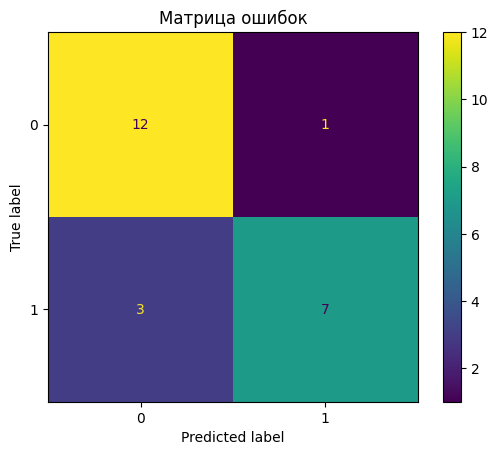

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Строим матрицу ошибок
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Матрица ошибок")
plt.show()

In [20]:
#Пример вывода:
#После выполнения этого кода появится графическое представление матрицы ошибок , например:
#[[12  1]
#[ 3 7]]
#Это означает: 
#12 верных нулей (TN) — отстающие правильно определены,
#1 ложных единицы (FP) — отстающие ошибочно классифицированы как лидеры,
#3 ложных нуля (FN) — лидеры ошибочно классифицированы как отстающие,
#7 верных единиц (TP) — лидеры правильно определены.

In [21]:
help = pd.read_csv('table1.csv')
help.head()

,Тип результата,Название на английском,Описание
0,True Negative (TN),Верный ноль,Модель правильно предсказала отстающий
1,False Positive (FP),Ложная единица,"Модель ошибочно предсказала лидер, а на самом ..."
2,False Negative (FN),Ложный ноль,"Модель ошибочно предсказала отстающий, а на са..."
3,True Positive (TP),Верная единица,Модель правильно предсказала лидер


✅ Итог задания 3.2:
Вы успешно построили матрицу ошибок с помощью confusion_matrix() и ConfusionMatrixDisplay,

После построения матрицы ошибок становится возможным анализировать ошибки модели и принимать обоснованные решения по её улучшению. В задачах бинарной классификации модель может совершать следующие типы ошибок:

False Positive (FP) — модель ошибочно предсказывает положительный класс (1), тогда как истинное значение соответствует отрицательному классу (0).
Например, регион ошибочно классифицируется как лидер, когда на самом деле он является отстающим.

False Negative (FN) — модель ошибочно предсказывает отрицательный класс (0), тогда как истинное значение принадлежит положительному классу (1).
Например, реальный лидер ошибочно определяется как отстающий.

Настройка порога вероятности

По умолчанию модель использует пороговое значение вероятности 0.5. То есть, если вероятность принадлежности к классу 1 превышает 0.5, модель относит объект к положительному классу. Однако этот порог может быть скорректирован в зависимости от приоритетов задачи:

Увеличение порога (например, до 0.6) приведёт к снижению количества FP за счёт увеличения числа FN.

Уменьшение порога (например, до 0.4) позволит находить больше истинных положительных случаев (повышается recall), но может увеличить число FP.

Пример изменения порога вероятности:

Отчёт по метрикам с порогом 0.6:
              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90        13
         1.0       1.00      0.70      0.82        10

    accuracy                           0.87        23
   macro avg       0.91      0.85      0.86        23
weighted avg       0.89      0.87      0.86        23


Матрица ошибок с порогом 0.6:


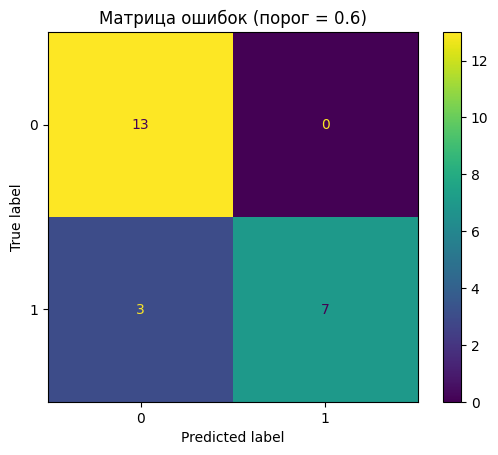

In [23]:

# 1. Получение вероятностей и формирование предсказаний с новым порогом
y_proba = model.predict_proba(X_test)[:, 1]
threshold = 0.6
y_pred_custom = (y_proba >= threshold).astype(int)

# 2. Вывод отчёта по метрикам
print("Отчёт по метрикам с порогом 0.6:")
print(classification_report(y_test, y_pred_custom))

# 3. Построение матрицы ошибок
print("\nМатрица ошибок с порогом 0.6:")
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Матрица ошибок (порог = 0.6)")
plt.show()

📊 Что анализировать в результатах?

In [30]:
help = pd.read_csv('table2.csv')
help.head()

,Метрика,Что смотреть
0,Precision,"Увеличилась ли точность? То есть, стала ли мод..."
1,Recall,"Уменьшился ли recall? То есть, не стала ли мод..."
2,F1-score,Как изменился баланс между precision и recall?
3,Confusion matrix,Сколько теперь FP и FN? Какой тип ошибок стал ...


🔹 Задание 3.3: Вычислите метрику ROC AUC

🎯 Цель: научиться -

▪️ вычислять ROC AUC — метрику, которая оценивает способность модели ранжировать вероятности принадлежности к положительному классу,

▪️ интерпретировать значение ROC AUC и понимать, насколько хорошо модель отличает "лидеров" от "отстающих".

💡 Что такое ROC AUC?

ROC AUC (Area Under the ROC Curve) — это площадь под ROC-кривой, которая показывает, насколько хорошо модель умеет ранжировать объекты по вероятностям.

ROC (Receiver Operating Characteristic) — график, где по осям отложены:

True Positive Rate (TPR) — доля правильно найденных лидеров,

False Positive Rate (FPR) — доля ошибочно найденных отстающих как лидеров.

AUC (Area Under Curve) — площадь под этой кривой.

📌 Чем выше ROC AUC , тем лучше модель разделяет классы.

In [25]:
help = pd.read_csv('table3.csv')
help.head()

,Значение ROC AUC,Интерпретация
0,0.5,Модель не лучше случайного угадывания
1,0.6–0.7,Приемлемое качество
2,0.7–0.85,Хорошее качество
3,0.85–0.95,Отличное качество
4,> 0.95,Очень высокое качество


In [26]:
from sklearn.metrics import roc_auc_score

# Получаем вероятности принадлежности к положительному классу (класс 1 — "лидер")
y_proba = model.predict_proba(X_test)[:, 1]

# Вычисляем ROC AUC
roc_auc = roc_auc_score(y_test, y_proba)

# Выводим результат
print("ROC AUC:", roc_auc)

ROC AUC: 0.976923076923077


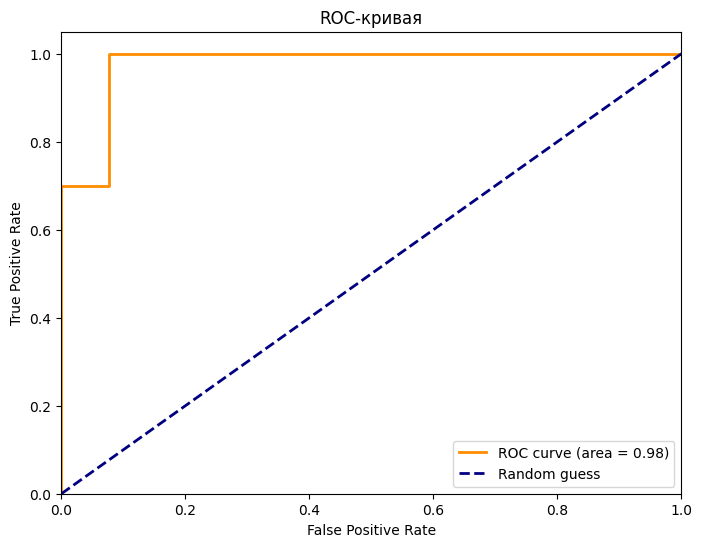

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Вычисляем координаты для ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc_value = auc(fpr, tpr)

# Строим график
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(loc="lower right")
plt.show()

ROC-кривая (англ. receiver operating characteristic, рабочая характеристика приёмника) — это график, который позволяет оценить качество бинарной классификации. Он отображает соотношение между долей объектов от общего количества носителей признака, верно классифицированных как несущие признак, и долей объектов от общего количества объектов, не несущих признака, ошибочно классифицированных как несущие признак, при варьировании порога решающего правила. 
На оси Y ROC-кривой отображается коэффициент истинных положительных результатов (TPR). Он измеряет долю реальных положительных случаев, которые были правильно идентифицированы моделью. Более высокий показатель TPR говорит о том, что модель хорошо справляется с определением положительных случаев. На оси X строится коэффициент ложных положительных результатов (False Positive Rate, FPR). Он измеряет долю реальных отрицательных экземпляров, которые модель неверно определила как положительные. Более низкий показатель FPR указывает на то, что модель хорошо справляется с предотвращением ложных срабатываний среди отрицательных случаев

🔹 Задание 3.4: Определите уровень регионов с неизвестной позицией в общем рейтинге

🎯 Цель:
На этом этапе вы используете обученную модель логистической регрессии, чтобы классифицировать регионы , у которых неизвестно место в итоговом рейтинге (пропущено или указано как '-', 'н/д' и т.п.).

Вы научитесь:

применять модель к новым данным,
делать предсказания класса (0 — отстающий, 1 — лидер),
интерпретировать результаты и оформлять финальный вывод.

In [28]:
# Шаг 1: Выбираем регионы с неизвестным статусом и делаем явную копию
unknown_regions = df_cleaned[df_cleaned['target'].isna()].copy()

# Шаг 2: Применяем модель для предсказания
unknown_predictions = model.predict(unknown_regions[X.columns])

# Шаг 3: Добавляем предсказания в датафрейм (без .loc, но безопасно)
unknown_regions['predicted_class'] = unknown_predictions

# Шаг 4: Выводим результаты
print("Прогнозы для регионов с неизвестным местом в рейтинге:")
for _, row in unknown_regions.iterrows():
    status = "лидер" if row['predicted_class'] == 1 else "отстающий"
    print(f"{row['Регион']} — {status}")

Прогнозы для регионов с неизвестным местом в рейтинге:
Астраханская область — отстающий
Воронежская область — лидер
Ивановская область — отстающий
Костромская область — отстающий
Краснодарский край — лидер
Республика Бурятия — отстающий
Республика Калмыкия — отстающий
Республика Хакасия — отстающий
Тульская область — лидер
Тюменская область — лидер


Давайте проанализируем данные из последнего столбца файла RussianRegions.csv — он называется "Место в итоговом рейтинге" , и именно на его основе мы строили нашу целевую переменную:

1 — если место ≤ 30 (регион считается лидером),
0 — если место > 30 или отсутствует (регион отстающий или неизвестный).

In [29]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Шаг 1: Загрузка данных
df_real = pd.read_csv('RussianRegions.csv', sep=';', on_bad_lines='skip')

# Шаг 2: Замена ',' на '.' и преобразование числовых столбцов в float
numeric_cols = df_real.columns[1:-1]  # Пропускаем 'Регион' и 'Место в итоговом рейтинге'
for col in numeric_cols:
    df_real[col] = pd.to_numeric(df_real[col].str.replace(',', '.'), errors='coerce')

# Шаг 3: Создаём целевую переменную на основе реального места
df_real['target_real'] = df_real['Место в итоговом рейтинге'].apply(
    lambda x: 1 if pd.notna(x) and int(x) <= 30 else 0
)

# Шаг 4: Формируем признаки и целевую переменную
X_real = df_real.drop(columns=['Регион', 'Место в итоговом рейтинге', 'target_real'], errors='ignore')
y_real = df_real['target_real']

# Шаг 5: Делаем предсказания
y_pred_real = model.predict(X_real)

# Шаг 6: Сравниваем предсказания с реальными данными
comparison = pd.DataFrame({
    'Регион': df_real['Регион'],
    'Реальный класс': y_real,
    'Предсказанный класс': y_pred_real,
    'Совпадает': y_real == y_pred_real
})

print("Сравнение предсказаний с реальными данными:")
print(comparison[['Регион', 'Реальный класс', 'Предсказанный класс', 'Совпадает']])

# Шаг 7: Вычисляем точность на этих данных
accuracy = accuracy_score(y_real, y_pred_real) * 100
print(f"\nТочность модели на регионах из RussianRegions.csv: {accuracy:.2f}%")

Сравнение предсказаний с реальными данными:
                 Регион  Реальный класс  Предсказанный класс  Совпадает
0  Астраханская область               0                  0.0       True
1   Воронежская область               1                  1.0       True
2    Ивановская область               0                  0.0       True
3   Костромская область               0                  0.0       True
4    Краснодарский край               1                  1.0       True
5    Республика Бурятия               0                  0.0       True
6   Республика Калмыкия               0                  0.0       True
7    Республика Хакасия               0                  0.0       True
8      Тульская область               1                  1.0       True
9     Тюменская область               1                  1.0       True

Точность модели на регионах из RussianRegions.csv: 100.00%


✅ Подведём итоги:

▪️ загрузили файл RussianRegions.csv ,
▪️ заменили запятые на точки для корректной работы с числами,
▪️ создали целевую переменную на основе реальных мест ,
▪️ применили обученную модель логистической регрессии к этим данным,
▪️ сравнили предсказания модели с реальным статусом регионов ,
▪️ вычислили точность модели на новых данных .

✅ Мы успешно выполнили все учебные задачи практического занятия